In [1]:
%matplotlib notebook
%pylab
from scipy.interpolate import griddata
import pandas as pd
from time import perf_counter
from sympy import*

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
from Advec_2D_module import*

In [3]:
order = array([4])        # polynomial order
N_element = array([10])
kstages = 3
cfl = 0.25
dt = 1e-2
Tfinal = 0.2

time_method = "IRK"      # IRK, BDF2 or BDF3
integration_type = 1      # % = 1 is inexact and = 2 is exact
iplot = False             # plot the solution
icase = 1                 # select icase: 1,2,3,4

alpha = 1              
beta = -1#-1/2                  # Dirichlet: alpha = 0, beta = 1
                               # Neumann: alpha = 1, beta = 0
                               # Robin: alpha = 1, beta != 0
        
x_boundary = [5,5]    # Bottom and Top (x = -1 and x = +1)
y_boundary = [5,5]    # Left and Right (y = -1 and x = +1)
    
# Domain and diffusion coefficient

ax = -1 ; bx = 1
c = 1

len_el = len(N_element)
len_pol = len(order)
l2e_norm = zeros((len_pol, len_el))
max_norm = zeros((len_pol, len_el))

Nv = N_element
    
for iN,N in enumerate(order):
    
    cfl = 1/(N+1)       # cfl number
    
    N = order[iN]
    if (integration_type == 1):
        Q = N
    elif (integration_type == 2):
        Q = N+1

    wall = 0
    

    for e, nel in enumerate(Nv):
            
        Nelx = nel; Nely = nel
        Nx = Nelx*N+1
        Ny = Nely*N+1
        Np = Nx*Ny
        Ne = Nelx*Nely
        Nbound = 2*Nx + 2*(Ny-2)
        Nside = 2*Ne + Nelx + Nely
        
        tic = perf_counter()
        
    
        qe, q,coord,intma,ntime,tf = diffusion_solver(N,Q,Ne, Np, ax, bx, Nelx, Nely, Nx, Ny, Nbound,Nside,\
                                             icase,Tfinal,c,cfl,kstages,time_method,alpha,beta,\
                                             x_boundary,y_boundary)
        
        #print("\twalltime: {}".format(tf))
            
        #Compute Norm
        
        #print(abs(q-qe))
        
        top = sum((q - qe)**2)
        bot = sum(qe**2)

        e2 = sqrt(top/bot)
        
        print("\tl2_norm = {:.4e}".format(e2))
        print("\twalltime: {}".format(tf))
        
        l2e_norm[iN,e] = e2
        
        
        

N = 4, nel = 100, Np = 1681
	dt = 2.3781e-04
	Number of time steps = 841
	l2_norm = 1.6376e-02
	walltime: 387.11046655900003


In [4]:
xmin = min(coord[:,0])
xmax = max(coord[:,0])
ymin = min(coord[:,1])
ymax = max(coord[:,1])
xe = coord[:,0]
ye = coord[:,1]
nx = 200
ny = 200
dx = (xmax-xmin)/nx
dy = (ymax-ymin)/ny
x1 = arange(xmin,xmax+dx,dx)
y1 = arange(ymin,ymax+dy,dy)
xi,yi = meshgrid(x1,y1)

<IPython.core.display.Javascript object>


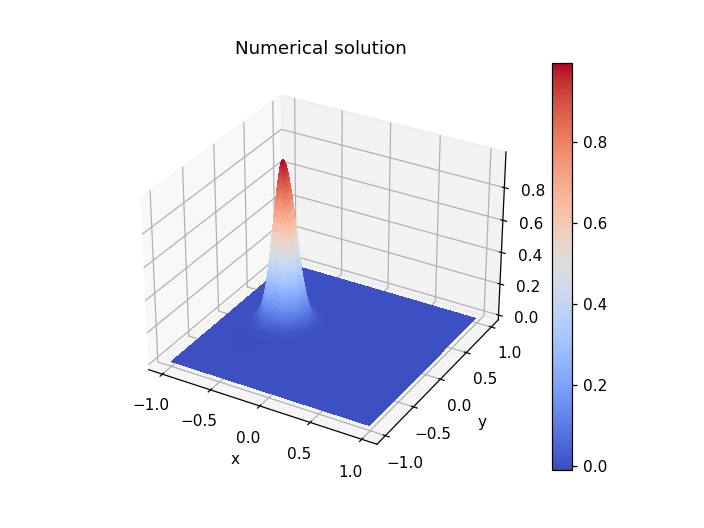

In [5]:
q_2d = griddata((xe,ye),q,(xi,yi), method='cubic')

fig = figure(1)
fx = fig.add_subplot(111, projection='3d')
surf = fx.plot_surface(xi,yi,q_2d,rstride = 1, cstride = 1,cmap=cm.coolwarm,antialiased=False)
fig.colorbar(surf)

title("Numerical solution")
xlabel("x")
ylabel("y")

show()

<IPython.core.display.Javascript object>


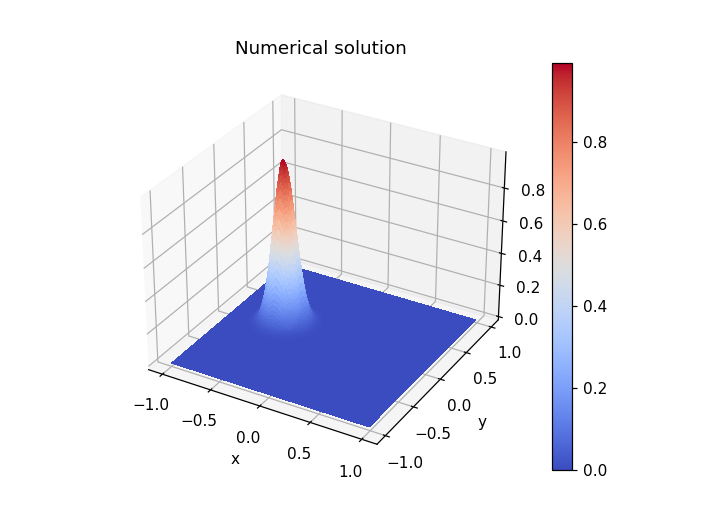

In [6]:
qe_2d = griddata((xe,ye),qe,(xi,yi), method='cubic')

fig = figure(2)
fx = fig.add_subplot(111, projection='3d')
surf = fx.plot_surface(xi,yi,qe_2d,rstride = 1, cstride = 1,cmap=cm.coolwarm,antialiased=False)
fig.colorbar(surf)

title("Numerical solution")
xlabel("x")
ylabel("y")

show()

<IPython.core.display.Javascript object>


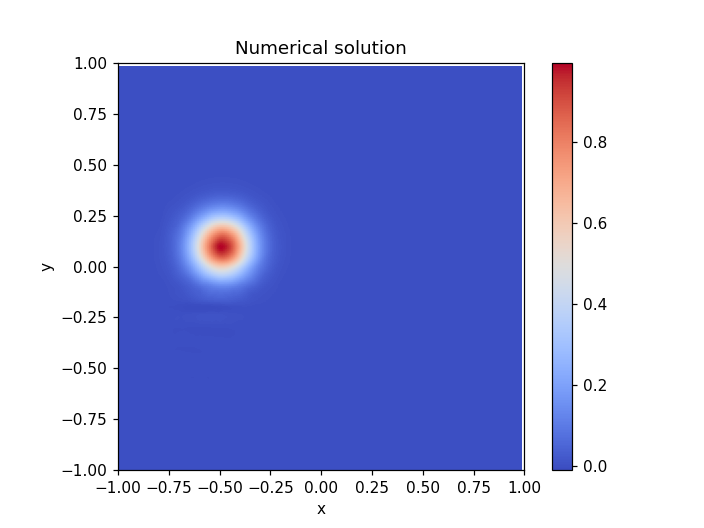

In [7]:
figure(3)
imshow(q_2d, extent=[ax, bx, ax, bx],origin='lower',cmap=cm.coolwarm)
colorbar()
clim(q.min(), q.max())
title("Numerical solution")
xlabel("x")
ylabel("y")
show()

<IPython.core.display.Javascript object>


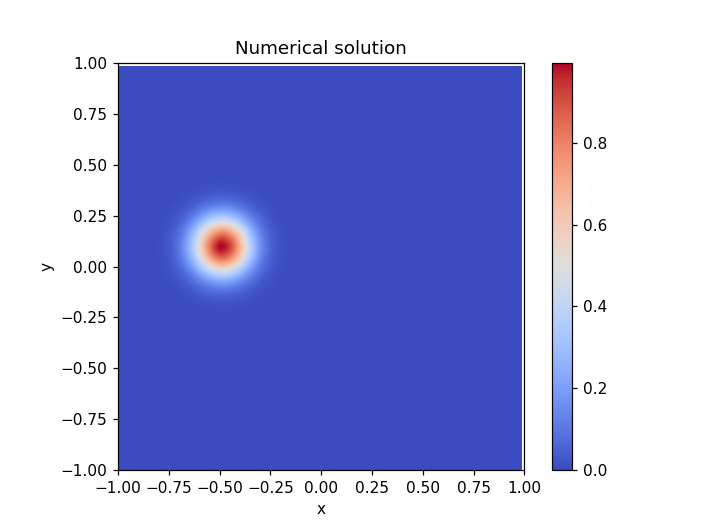

In [8]:
figure(4)
imshow(qe_2d, extent=[ax, bx, ax, bx],origin='lower',cmap=cm.coolwarm)
colorbar()
clim(qe.min(), qe.max())
title("Numerical solution")
xlabel("x")
ylabel("y")
show()

In [9]:
l2e_norm[iN,e]

0.016375999585787896